In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iterno_orig=np.loadtxt("iterno_orig.dat")
iterno_apio=np.loadtxt("iterno_apio.dat")
no=iterno_orig[0]
for i in range(len(iterno_orig)):
    if (iterno_orig[i]!=no):
        iterno_orig[i]=iterno_orig[i]-1

In [3]:
print(iterno_orig)
print(iterno_apio)

[99. 99. 99. 99. 54. 99. 99. 99. 99. 99. 63.]
[99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]


In [4]:
print(sum(iterno_orig))
print(sum(iterno_apio))

1008.0
1089.0


In [5]:
apio_io=np.loadtxt("apio_io.dat")
orig_io=np.loadtxt("orig_io.dat")

if len(apio_io)>len(orig_io):
    apio_io=np.delete(apio_io,np.where(iterno_orig!=no)[0])
elif len(apio_io)<len(orig_io):
    orig_io=np.delete(orig_io,np.where(iterno_apio!=no)[0])

In [6]:
print(len(orig_io))
print(len(apio_io))

9
9


In [7]:
orig_io_step=np.loadtxt("orig_io_step.dat")
orig_comp_step=np.loadtxt("orig_comp_step.dat")
apio_io_step=np.loadtxt("apio_io_step.dat")

In [8]:
print(len(orig_comp_step))
print(len(orig_io_step))

1010
1009


In [9]:
#i1=np.where(iterno_orig!=no)[0][0]
#i2=np.where(iterno_orig!=no)[0][1]
#if len(orig_comp_step)>len(orig_io_step):   
orig_comp_step=np.delete(orig_comp_step,[len(orig_comp_step)-1])
#elif len(orig_comp_step)<len(orig_io_step):
#    orig_io_step=np.delete(orig_io_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])

Text(0.5, 0, 'iteration')

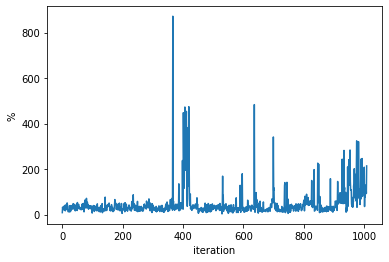

In [10]:
vec2=(orig_comp_step/orig_io_step)*100
plt.plot(vec2)
plt.ylabel("%")
plt.xlabel("iteration")

In [11]:
l1=len(orig_io_step)
l2=len(apio_io_step)
diff=l1-l2

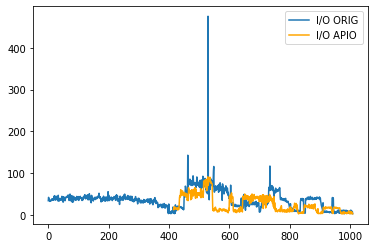

In [12]:
#fig,ax=plt.subplots(1,2,figsize=(20,5))
x1=np.linspace(0,l1,l1)
x2=np.linspace(diff,l1,l2)
plt.plot(x1,orig_io_step,label="I/O ORIG")
plt.plot(x2,apio_io_step,label="I/O APIO",c="orange")
plt.legend()
#ax[0].legend()
#ax[1].legend()

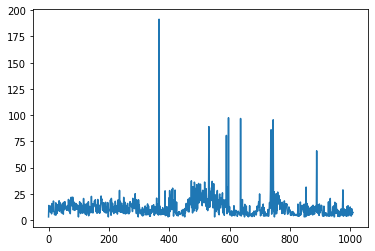

In [13]:
plt.plot(orig_comp_step,label="COMP ORIG")

Text(1, 6000, 'outlier')

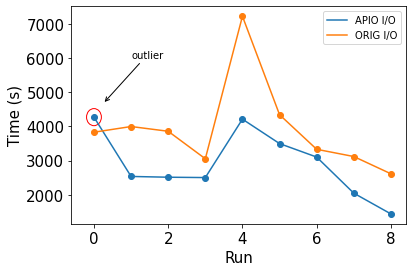

In [14]:
import matplotlib.patches as mpatches
fig,ax=plt.subplots()
p = mpatches.Ellipse((0,apio_io[0]), width=0.4,height=500,fill=0,color='r')
ax.add_patch(p)
ax.plot()
ax.plot(apio_io, label="APIO I/O")
ax.scatter(np.linspace(0,8,9),apio_io)
ax.plot(orig_io,label="ORIG I/O")
ax.scatter(np.linspace(0,8,9),orig_io)
ax.legend()
ax.set_ylabel("Time (s)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.annotate(text='outlier', xy=(0.25,apio_io[0]+400), xytext=(1,6000),arrowprops=dict(arrowstyle='->'))
#ax.annotate(text='', xy=(3.6,orig_io[4]-150), xytext=(2,6200),arrowprops=dict(arrowstyle='->'))


In [15]:
#plt.hist(orig_io)

[]

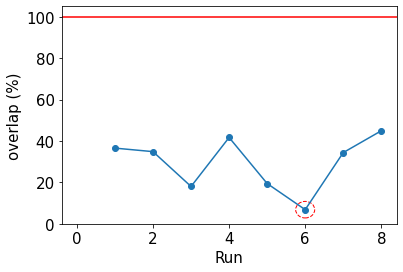

In [16]:
vec=(orig_io-apio_io)*100/orig_io
fig,ax=plt.subplots()
ax.plot(np.linspace(1,8,8),vec[1:9])
ax.scatter(np.linspace(0,8,9),vec[0:9],c='tab:blue')
#ax.plot(np.linspace(1,3,3),vec[1:4],c='tab:blue')
#ax.scatter(np.linspace(2,6,5),vec[2:7],c='tab:blue')
#ax.plot(np.linspace(5,8,4),vec[5:9],c='tab:blue')
ax.axhline(100,-1,9,c='r')
ax.set_ylabel("overlap (%)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0,105)
#ax.plot([3,5],[vec[3],vec[5]],c='r',ls='dashed')

p = mpatches.Ellipse((6,vec[6]), width=0.5,height=8,fill=0,color='r',ls='dashed')
ax.add_patch(p)
ax.plot()

In [17]:
vector=vec[[1,2,3,4,5,7,8]]
print("mean:",np.mean(vector))
print("std:",np.std(vector))
print("max:",np.max(vector))
print("min:",np.min(vector))

mean: 32.83559395230173
std: 9.584284265126565
max: 44.91850941895773
min: 18.024786797536503


In [17]:
avg=[]
err=[]
acc=0
for i in iterno_orig[iterno_orig==no]:
    interval=vec2[acc:acc+int(i)]
    avg.append(sum(interval)/int(i))
    err.append(1.96*(np.std(interval)/np.sqrt(int(i))))
    acc+=int(i)
avg=np.asarray(avg)

In [18]:
avg
len(avg)

9

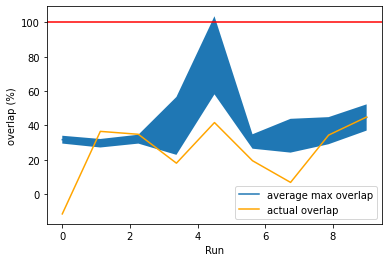

In [19]:
fig,ax=plt.subplots()
x=np.linspace(0,len(avg),len(avg))
ax.plot(x,avg,label="average max overlap")
ax.fill_between(x, avg-err, avg+err)
ax.plot(x, vec,c="orange",label="actual overlap")
ax.set_ylabel("overlap (%)")
ax.set_xlabel("Run")
ax.legend()
ax.axhline(100,0,16,c="r")